# BT1

In [29]:
%matplotlib notebook
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from daxs.measurements import Source, Xas, Xes
from scipy.integrate import simpson

In [38]:
name = [ '1a','1b','1c','1d','1e','1f','2a','2b','2c','2d','2e','2f'
       ] 
  
counter_XAS = {'x':'hdh_energy', 'signal':"gdall", "monitor":"I0t"}
counter_XES = {'x':'xes_en_texs', 'signal':"gdall", "monitor":"I0t"}

<IPython.core.display.Javascript object>


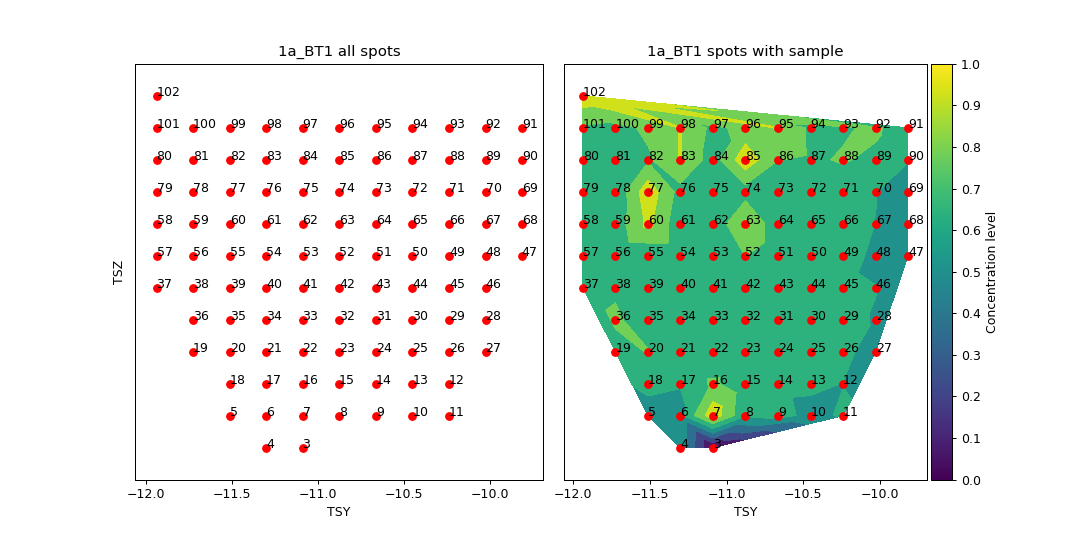

C:\Users\oppcexpv\AppData\Local\Temp\ipykernel_25596\3278087746.py:80: UserWarning: The following kwargs were not used by contour: 'level'
  ax2.tricontourf(TSY,TSZ,max_intensity, level=50)


<IPython.core.display.Javascript object>


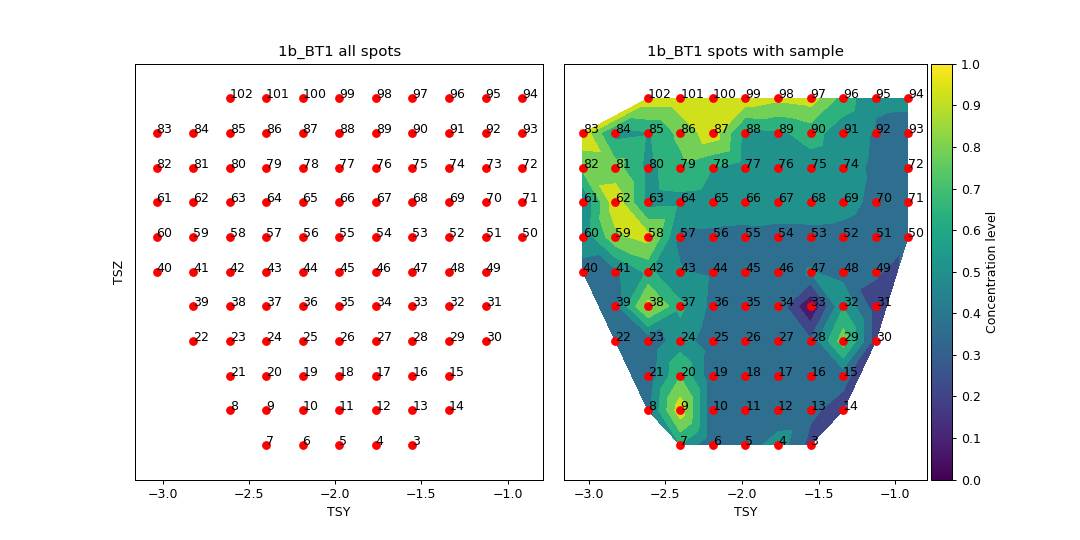

<IPython.core.display.Javascript object>


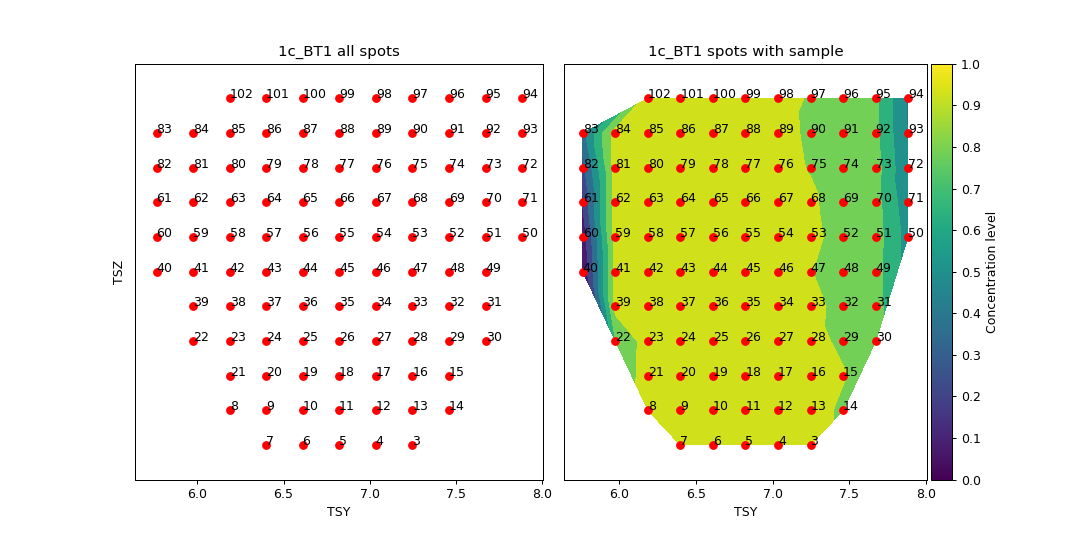

<IPython.core.display.Javascript object>


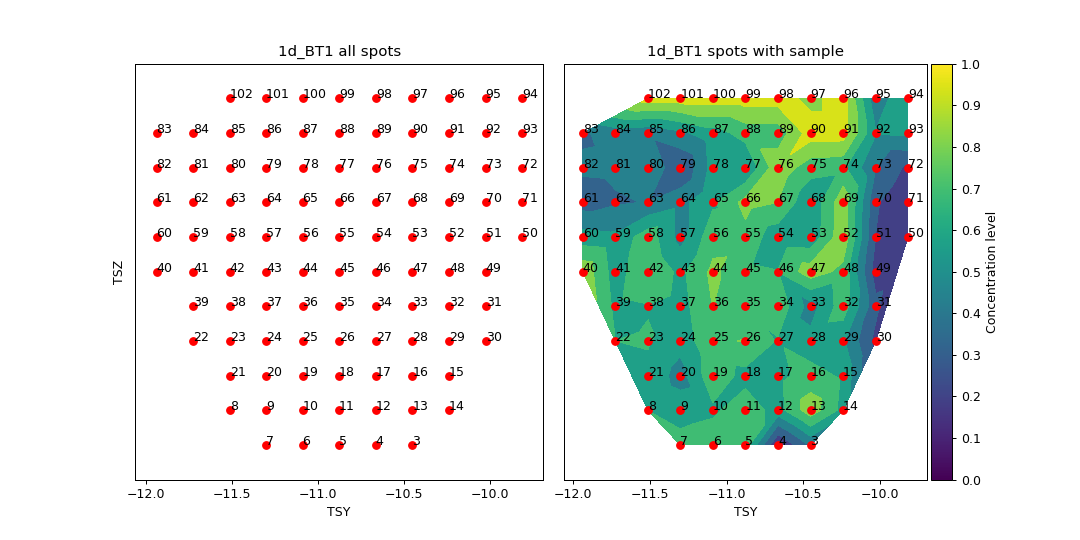

<IPython.core.display.Javascript object>


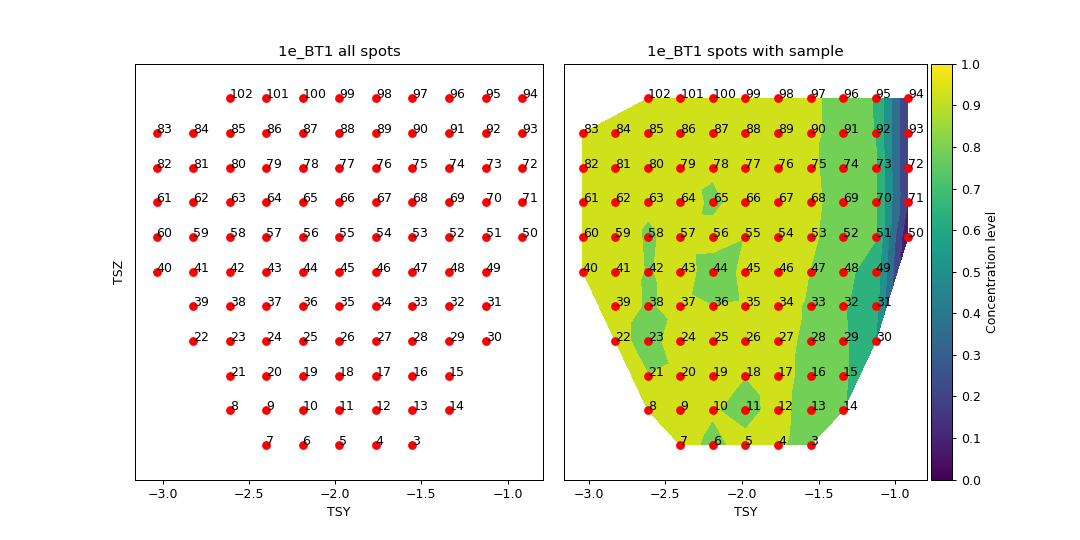

<IPython.core.display.Javascript object>


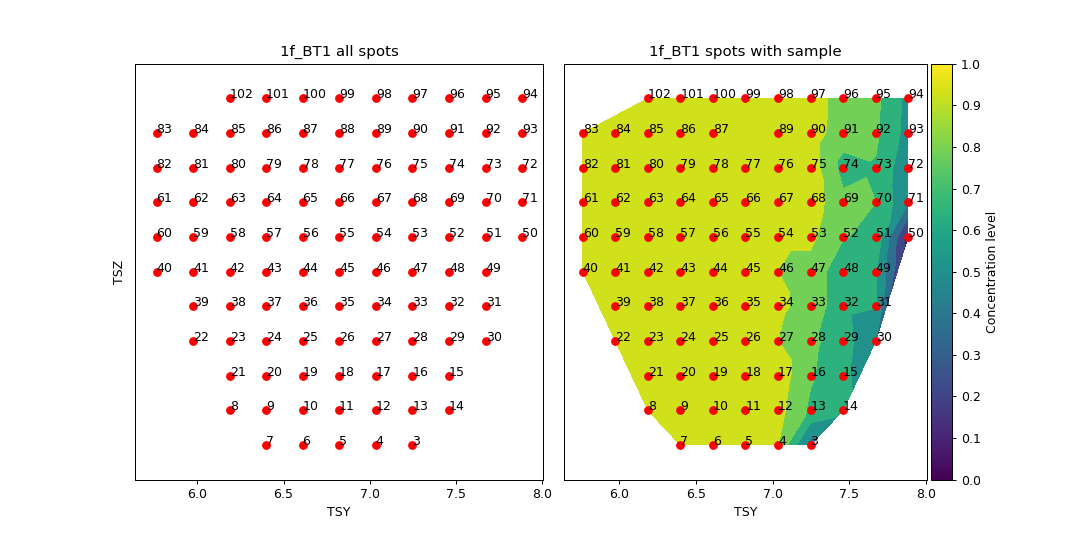

<IPython.core.display.Javascript object>


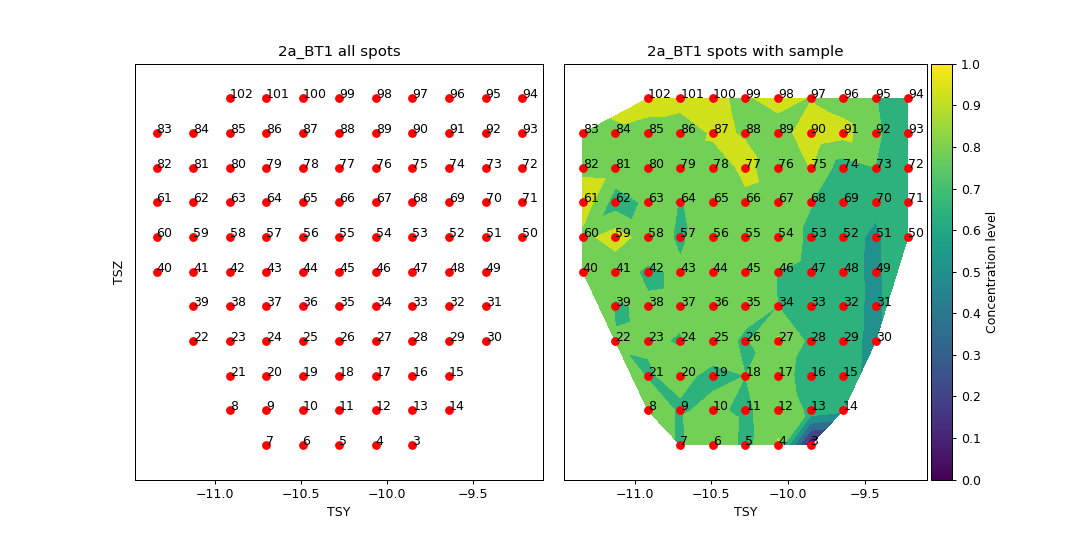

<IPython.core.display.Javascript object>


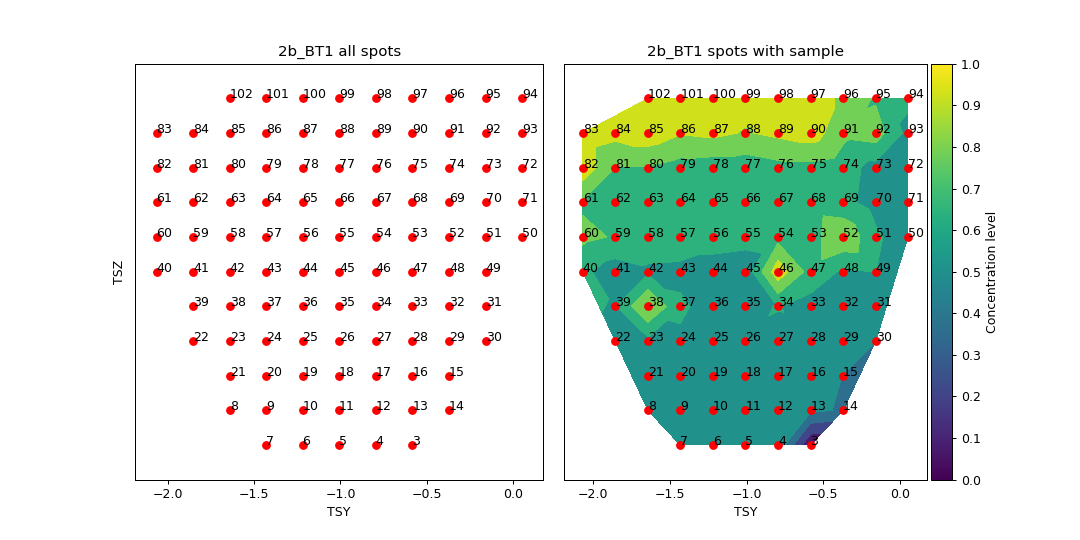

<IPython.core.display.Javascript object>


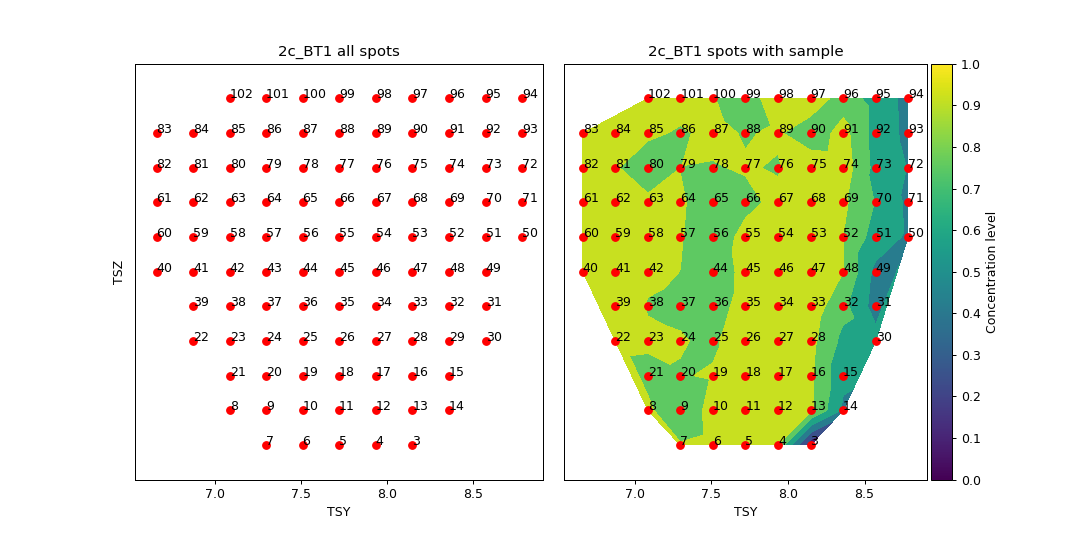

<IPython.core.display.Javascript object>


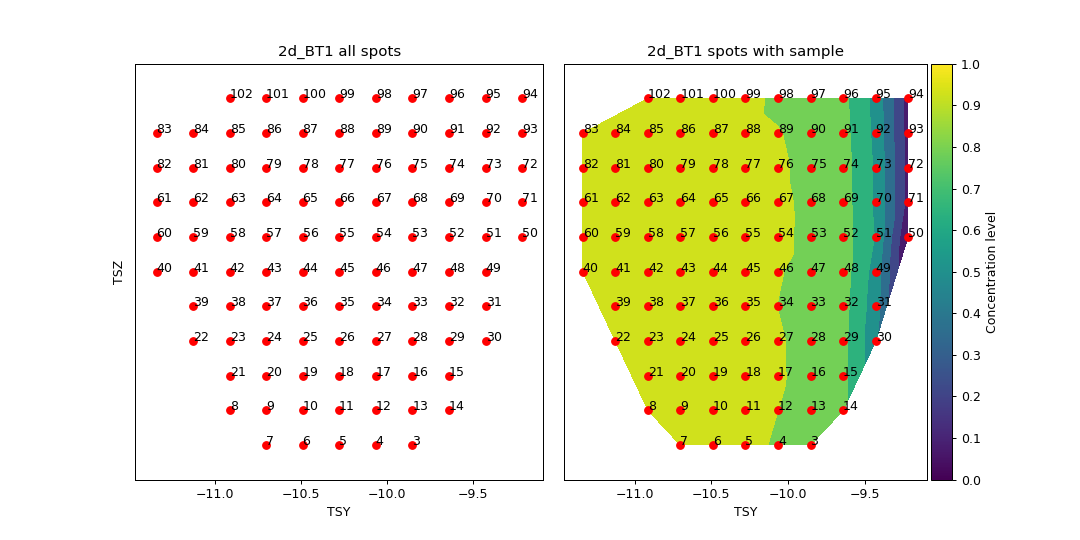

<IPython.core.display.Javascript object>


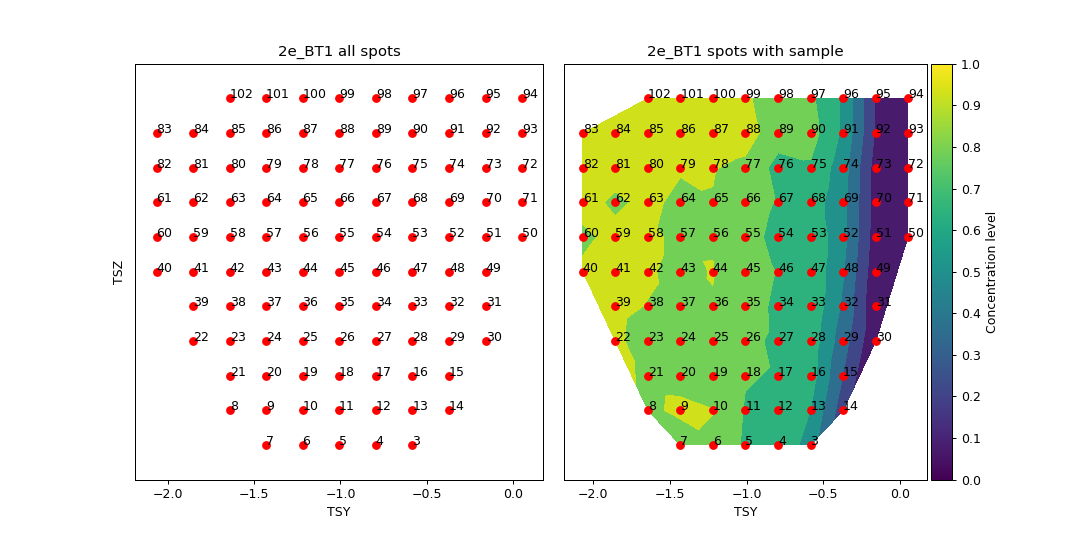

<IPython.core.display.Javascript object>


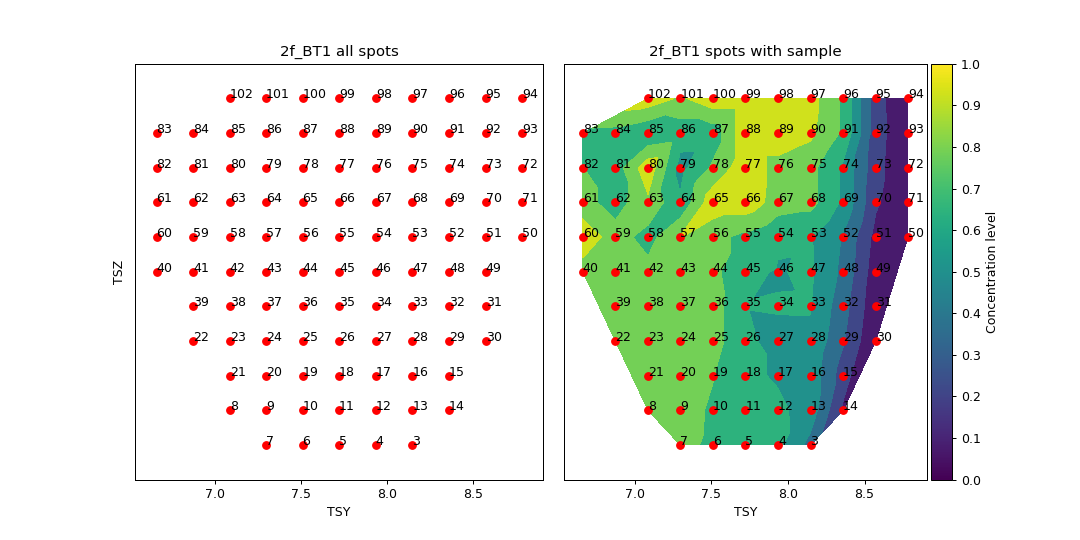

"\n    source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES\n    measurment_XAS = Xas(source,counters=counter_XAS)\n    measurment_XAS.find_outliers()\n    measurment_XAS.remove_outliers()\n    measurment_XAS.normalize(mode = 'area')\n    np.savetxt(q+'_XAS_BT2.txt',np.c_[measurment_XAS.x*1000, measurment_XAS.signal] )\n    \n    source2 = Source(file, list(range(3,102)), None) #3-102 for XAS, #1-12 for XES\n    measurment_XAS2 = Xas(source2,counters=counter_XAS)\n    measurment_XAS2.find_outliers()\n    measurment_XAS2.remove_outliers()\n    measurment_XAS2.normalize(mode = 'area')\n\n    fig=plt.figure()\n\n    plt.plot(measurment_XAS.x*1000, measurment_XAS.signal, label='Corrected')\n    plt.plot(measurment_XAS2.x*1000, measurment_XAS2.signal, label='Origin')\n\n    plt.title('%s'%q)\n    plt.legend()\n    #plt.savefig('%s correction.png'%q, bbox_inches='tight')\n    \n"

In [39]:
for q in name:

    file = r'C:\Users\oppcexpv\Downloads\ihch1632\ihch1632\id26\20220826\191_'+ q + r'\191_' + q + r'_xanes\191_' + q + r'_xanes.h5'
    file = file.replace('\\', '/')

    a = np.linspace(3.1, 102.1, 100)
    b = np.linspace(3.2, 102.2, 100)

    TSY = []
    TSZ = []
    energy = []
    gdall = []
    I0t = []

    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/hdh_energy' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))

        for i in b:
            #print(i)
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])

 #####################################
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))

    ok = []
    ok_3 = []
    max_intensity = []
    for n in range(len(energy)): 
        head =  intensity[n][:50]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-50:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][200:250]
        middle = middle[abs(stats.zscore(middle))<2]
        if ((tail.mean()/head.mean() > 0.7) and (middle.mean()>head.mean())): #####################################
            ok.append(n)
            ok_3.append(n+3)

        peak = intensity[n][100:250]
        for i in range(2,len(peak)-2):
            before = peak[i-2:i].mean()
            after = peak[i+1:i+3].mean()
            low =  peak[i-2:i+3].min()
            if peak[i]-low > 4*(before-low + after-low)/2:
                peak[i] = (before + after)/2
        max_intensity.append(simpson(peak))
            
    for i in range(len(max_intensity)):
        max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))
    for i in range(len(max_intensity)):
        max_intensity[i] = (max_intensity[i]-min(max_intensity))/(max(max_intensity)-min(max_intensity))
            
 #####################################
    #fig=plt.figure()
    fig = plt.figure(figsize=(12, 6), dpi=100)
    grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1], sharey=ax1)

    cmap = plt.cm.get_cmap()
    norm = mpl.colors.Normalize(vmin = 0, vmax = 1)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    colors = plt.cm.jet(np.linspace(0, 1, 100))
    ticks = np.linspace(0, 1, 11)
    cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                        shrink=1.0, fraction=0.1, pad=0.01, label='Concentration level')
    ax2.tricontourf(TSY,TSZ,max_intensity, level=50)
    for i in ok:
        ax2.scatter(TSY[i], TSZ[i], color = 'red')
        ax2.text(TSY[i], TSZ[i], i+3)

    for i in range(len(TSY)):
        ax1.scatter(TSY[i], TSZ[i], color = 'red')
        ax1.text(TSY[i], TSZ[i], i+3)
    ''' '''
    ax1.set_xlabel('TSY')
    ax2.set_xlabel('TSY')
    ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax1.set_ylim(min(TSZ)-0.1, max(TSZ)+0.1)
    ax1.set_ylabel('TSZ')
    ax2.set_yticks([])
    ax1.set_title('%s_BT1 all spots'%q)
    ax2.set_title('%s_BT1 spots with sample'%q)
    plt.savefig('%s spots_BT1.png'%q, bbox_inches='tight')
 #####################################
"""
    source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
    measurment_XAS = Xas(source,counters=counter_XAS)
    measurment_XAS.find_outliers()
    measurment_XAS.remove_outliers()
    measurment_XAS.normalize(mode = 'area')
    np.savetxt(q+'_XAS_BT2.txt',np.c_[measurment_XAS.x*1000, measurment_XAS.signal] )
    
    source2 = Source(file, list(range(3,102)), None) #3-102 for XAS, #1-12 for XES
    measurment_XAS2 = Xas(source2,counters=counter_XAS)
    measurment_XAS2.find_outliers()
    measurment_XAS2.remove_outliers()
    measurment_XAS2.normalize(mode = 'area')

    fig=plt.figure()

    plt.plot(measurment_XAS.x*1000, measurment_XAS.signal, label='Corrected')
    plt.plot(measurment_XAS2.x*1000, measurment_XAS2.signal, label='Origin')

    plt.title('%s'%q)
    plt.legend()
    #plt.savefig('%s correction.png'%q, bbox_inches='tight')
    
"""

In [21]:
max_intensity


[0.3350712036970318,
 0.34537918486196245,
 0.28829433170595103,
 0.27392290182285745,
 0.337397366135489,
 0.34985631599270944,
 0.33452354050674904,
 0.2618532937782157,
 0.24671439066847056,
 0.324300910451825,
 0.185744897094455,
 0.1447333631364023,
 0.18025694990181287,
 0.2367955542419994,
 0.32105805737679777,
 0.2799255327481451,
 0.28126728248566474,
 0.3679181130449314,
 0.29692076307245774,
 0.32935378266547893,
 0.30357977637517053,
 0.32277573958606254,
 0.21852612938108418,
 0.28099915223966215,
 0.31738856515175523,
 0.28559263542166785,
 0.16258024187652081,
 0.09989863450978344,
 0.2751785532411228,
 0.2968314326457771,
 0.3892020384722306,
 0.3611262738040422,
 0.3715633231133297,
 0.33289414371707016,
 0.41247343721838226,
 0.3623765878546661,
 0.3616095540590453,
 0.3781146641152002,
 0.36530717963574144,
 0.34464283482410807,
 0.37829593042159015,
 0.33615898368626757,
 0.3527970664391555,
 0.35451046521728047,
 0.33509461399301294,
 0.2680551784257082,
 0.2087238

In [ ]:
len(intensity)

# XES

<IPython.core.display.Javascript object>


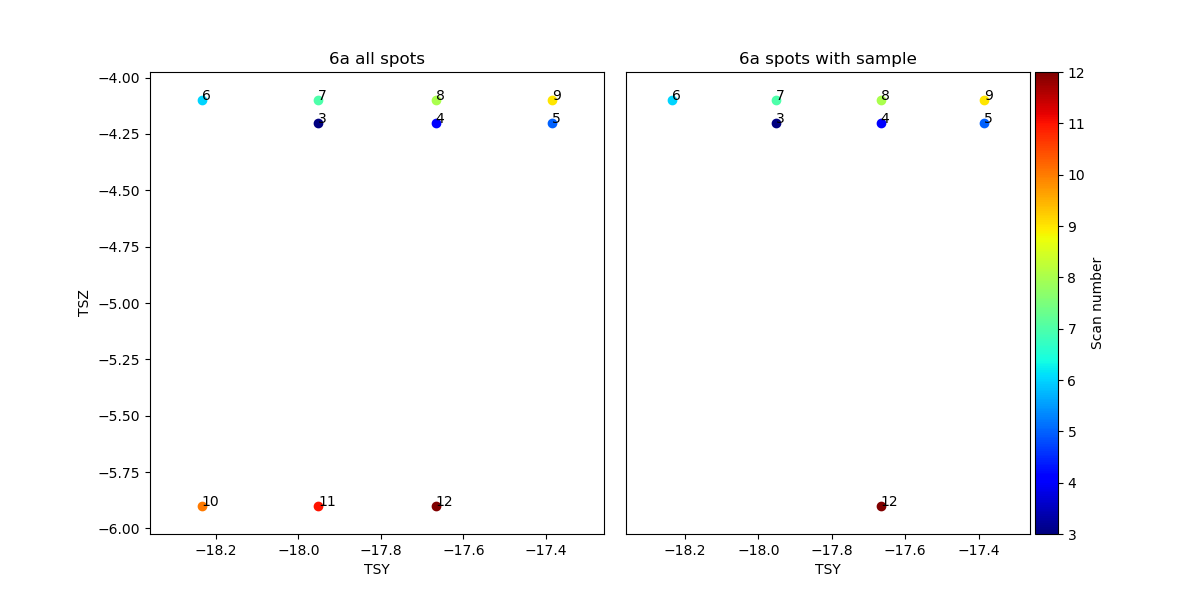

<IPython.core.display.Javascript object>


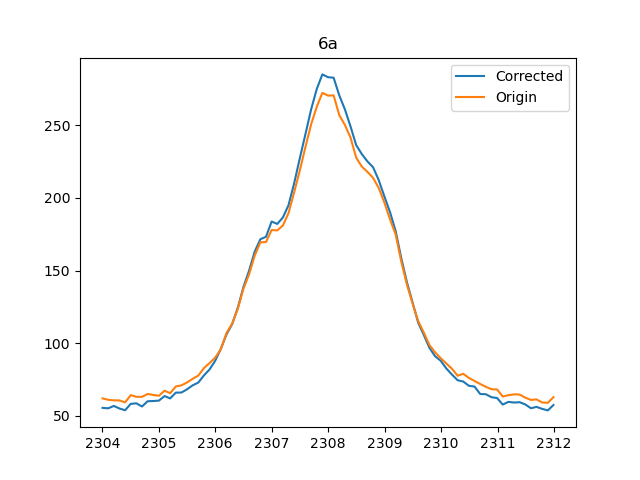

<IPython.core.display.Javascript object>


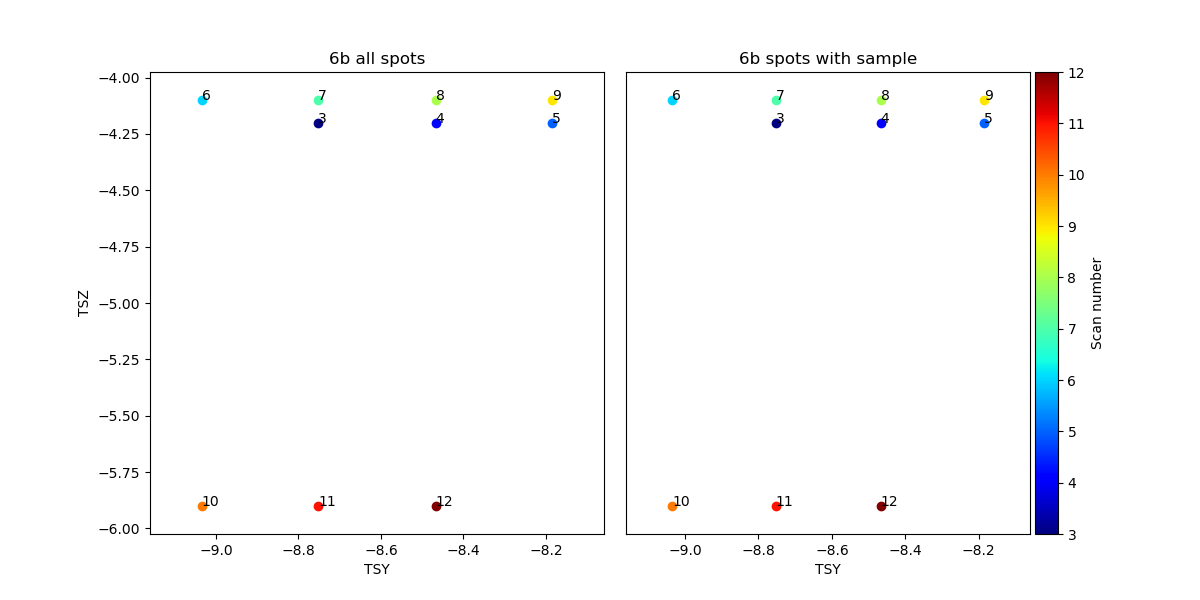

<IPython.core.display.Javascript object>


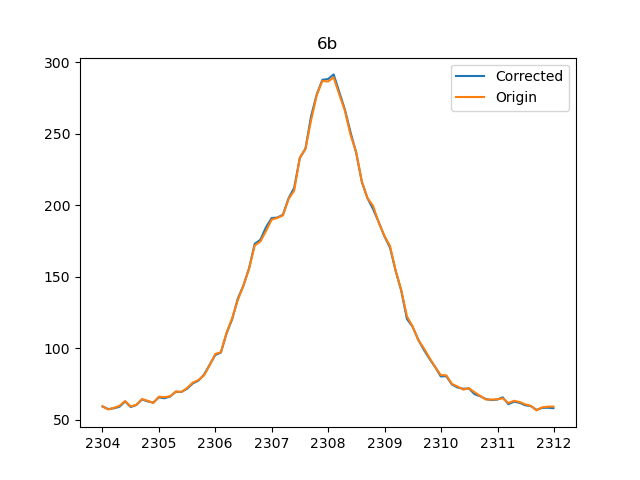

<IPython.core.display.Javascript object>


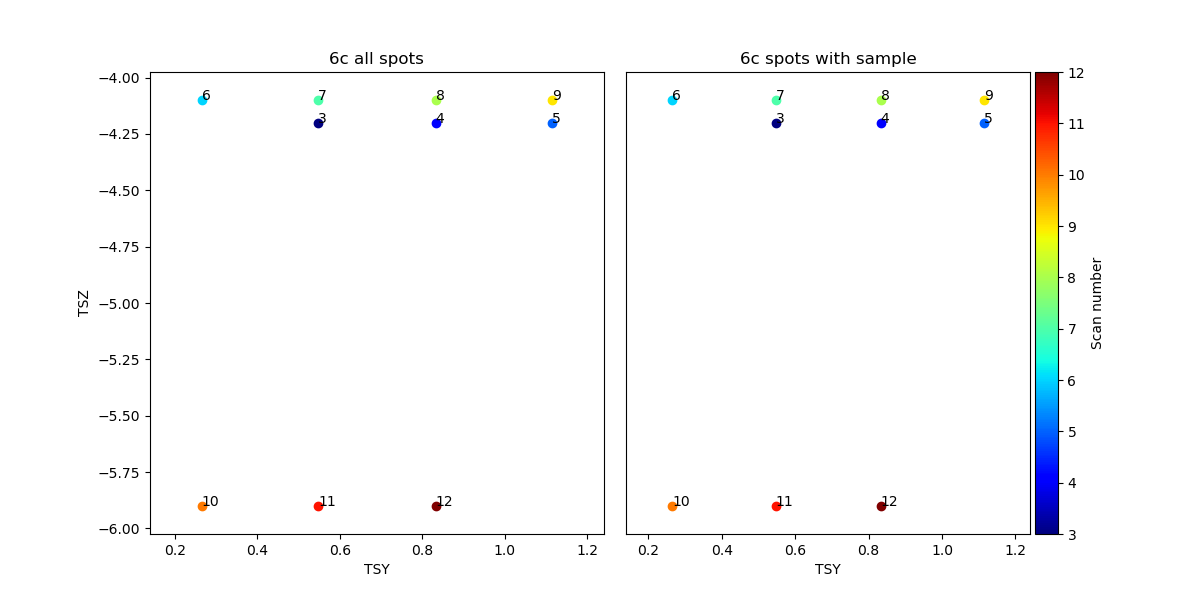

<IPython.core.display.Javascript object>


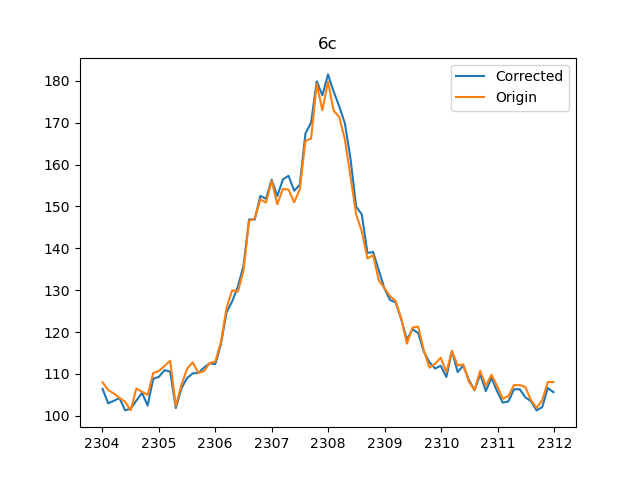

<IPython.core.display.Javascript object>


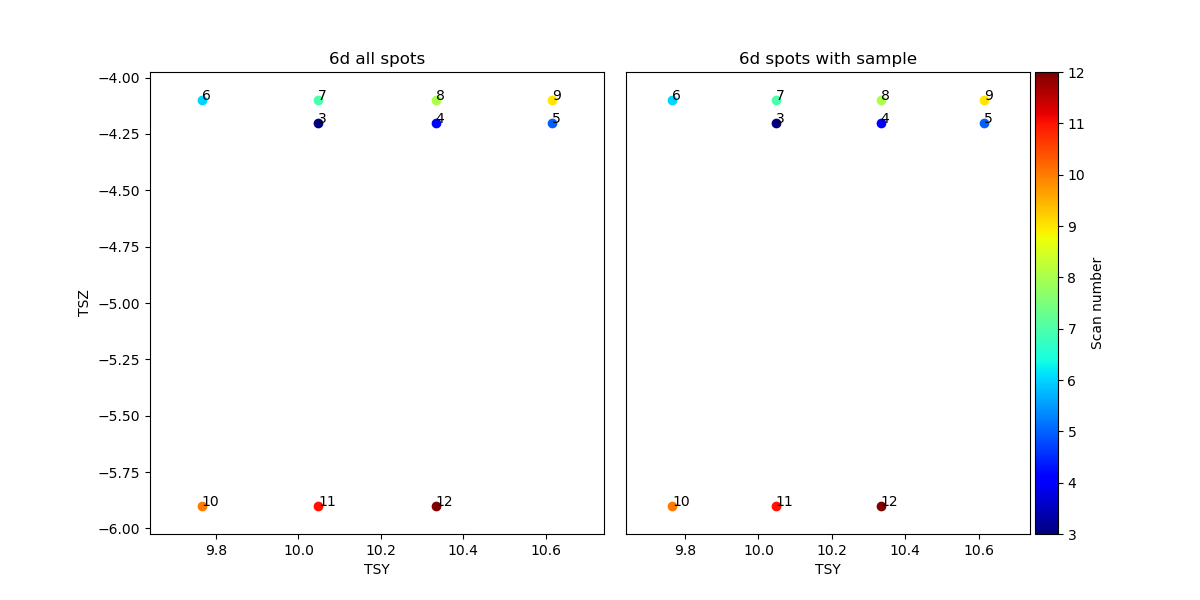

<IPython.core.display.Javascript object>


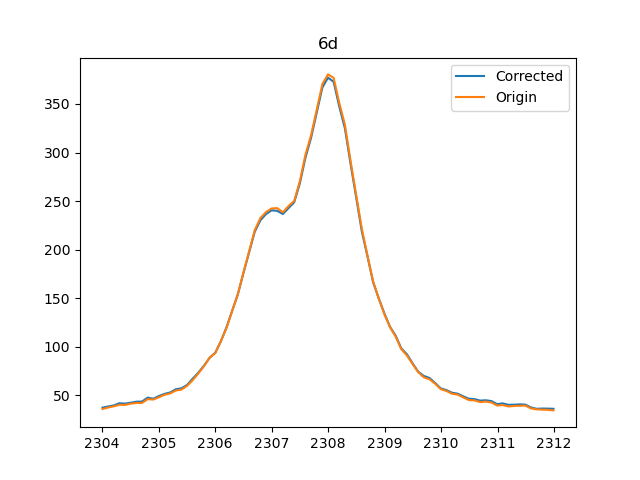

<IPython.core.display.Javascript object>


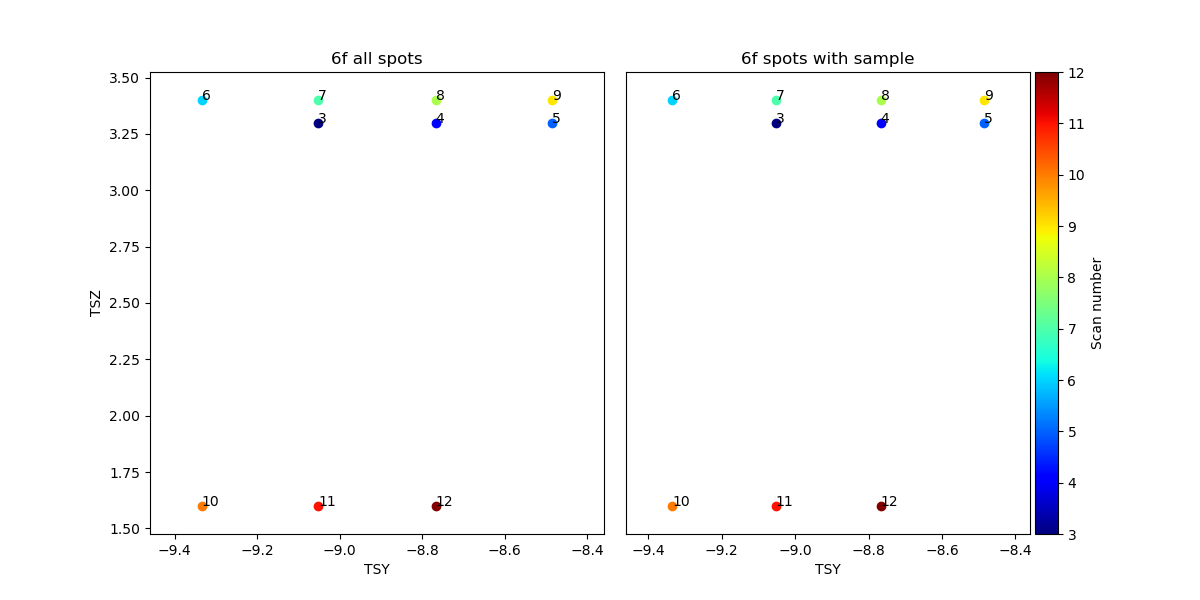

<IPython.core.display.Javascript object>


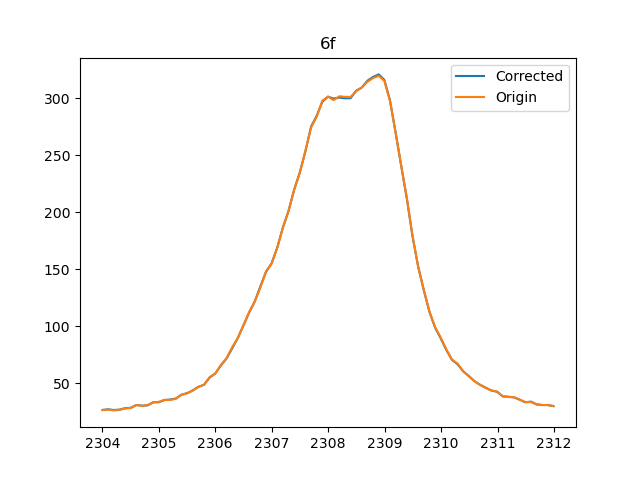

<IPython.core.display.Javascript object>


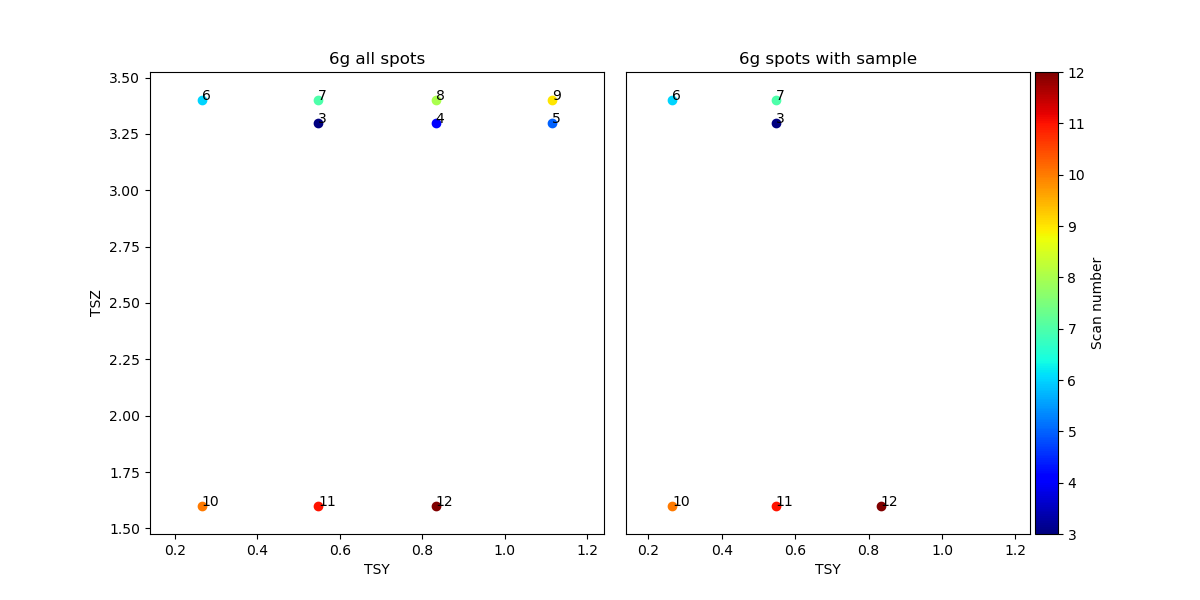

<IPython.core.display.Javascript object>


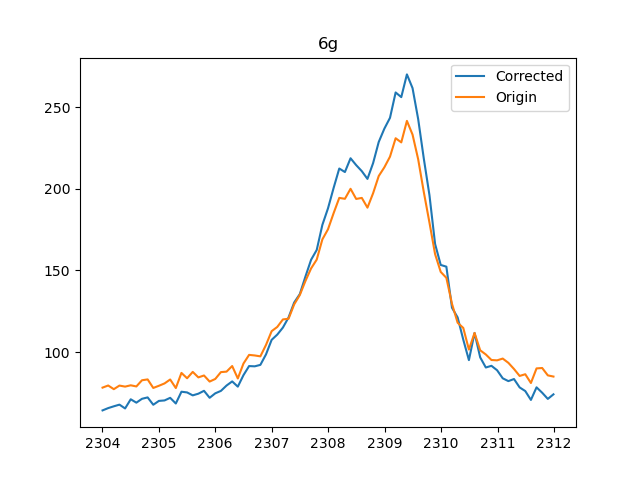

<IPython.core.display.Javascript object>


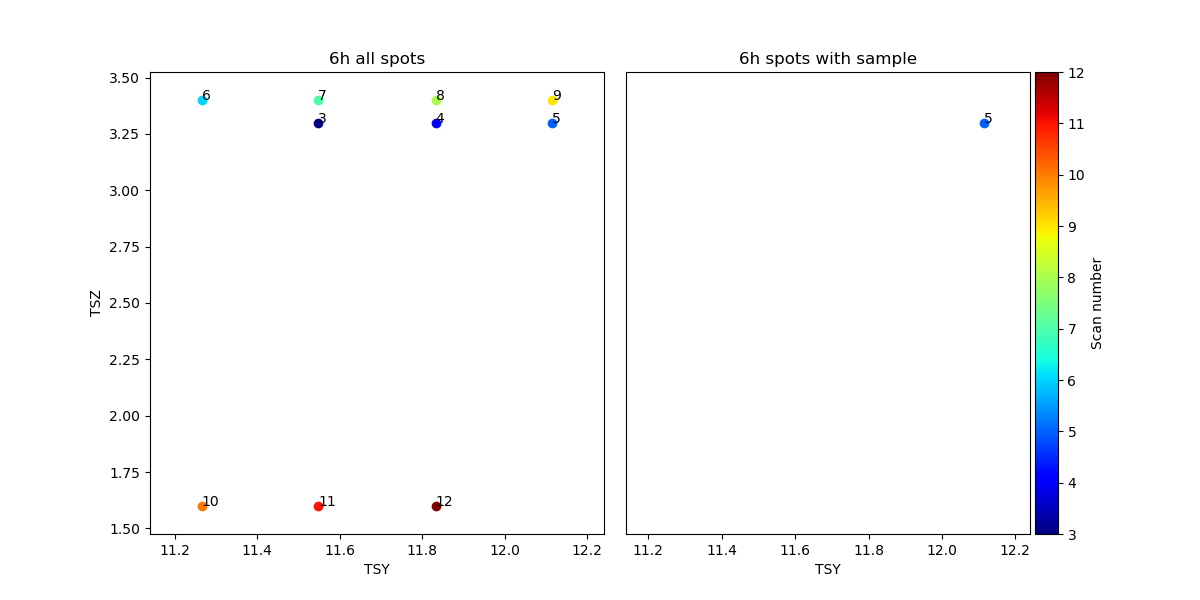

<IPython.core.display.Javascript object>


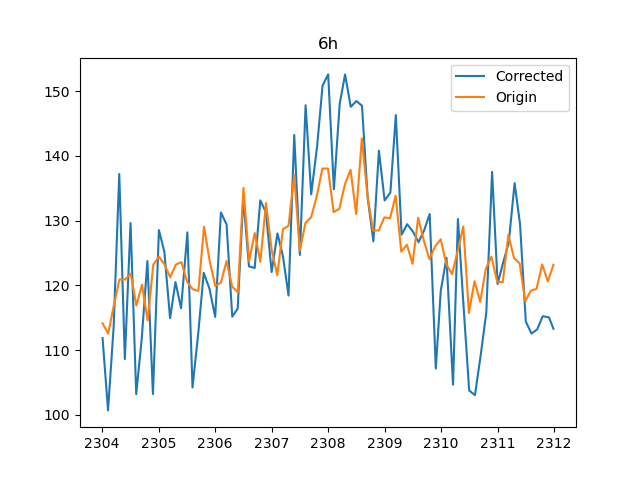

<IPython.core.display.Javascript object>


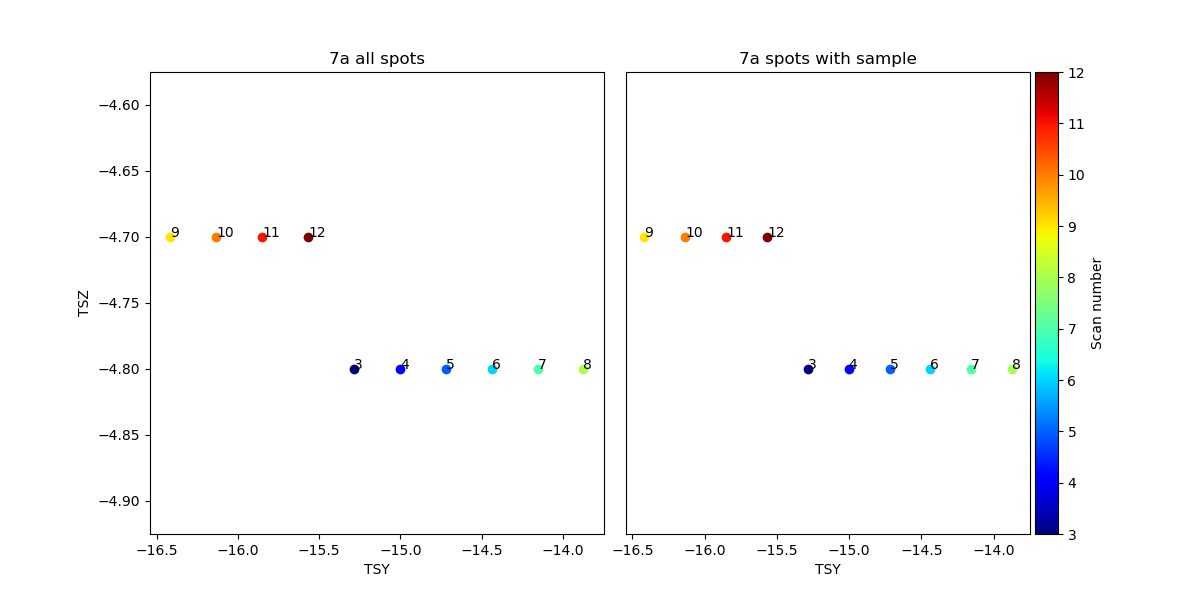

<IPython.core.display.Javascript object>


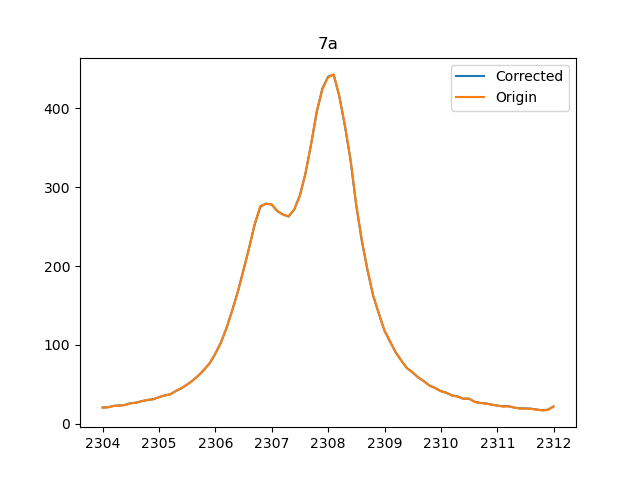

<IPython.core.display.Javascript object>


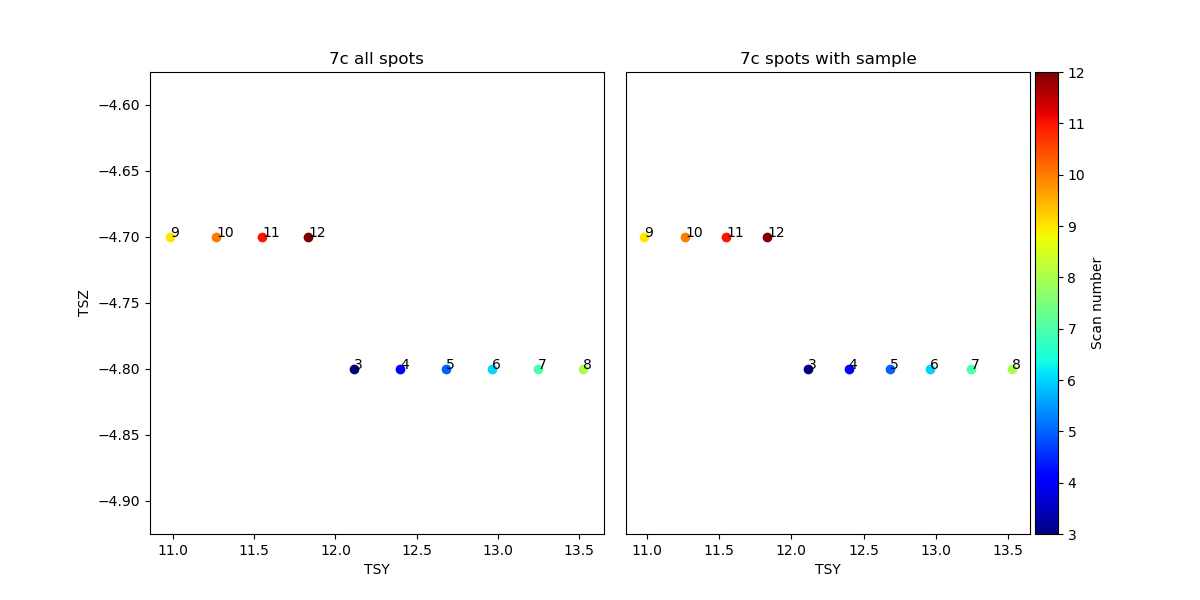

<IPython.core.display.Javascript object>


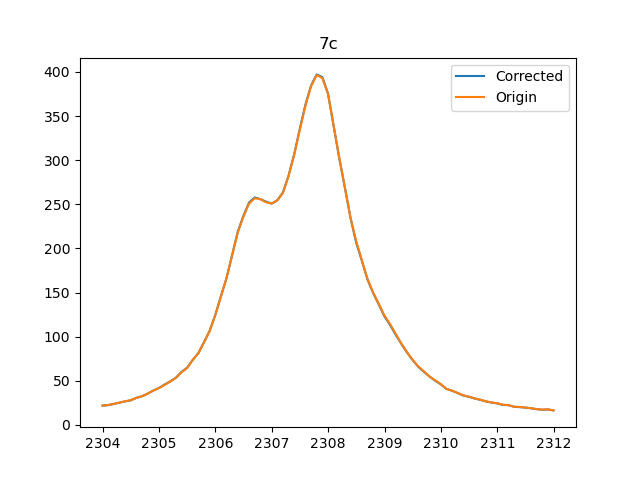

<IPython.core.display.Javascript object>


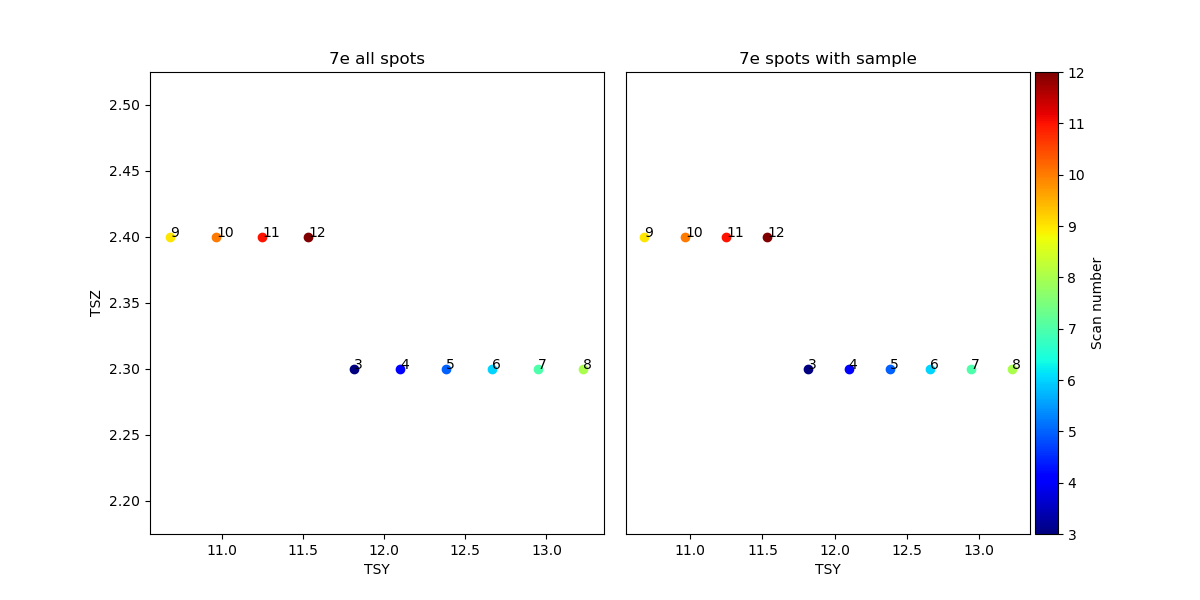

<IPython.core.display.Javascript object>


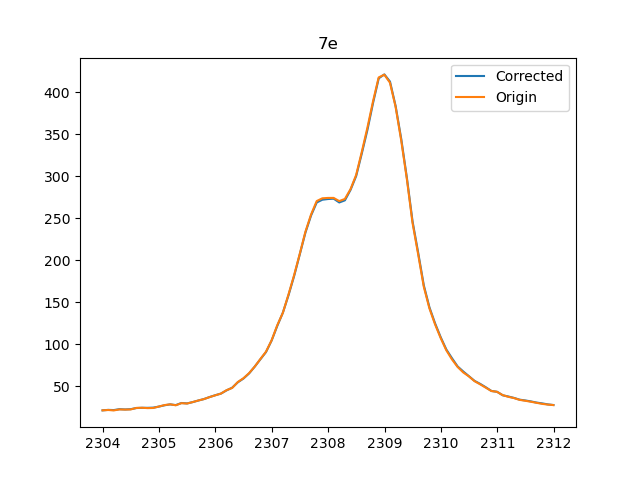

In [97]:
for q in name:
    file = r'C:\Users\oppcexpv\Downloads\252_data\252-' + q + r'\252-' + q + r'_xes\252-' + q + r'_xes.h5'
    file = file.replace('\\', '/')

    a = np.linspace(3.1, 12.1, 10)

    energy = []
    gdall = []
    I0t = []
    TSY = []
    TSZ = []

    with h5py.File(file, 'r') as f:
        for i in a:
            #print(i)
            g = f.get('%s/instrument/xes_en_texs' %f'{i}')
            energy.append(np.array(g.get('data')))
            h = f.get('%s/instrument/gdall' %f'{i}')
            gdall.append(np.array(h.get('data')))
            l = f.get('%s/instrument/I0t' %f'{i}')
            I0t.append(np.array(l.get('data')))
            g = f.get('%s/instrument/TSY_cnt' %f'{i}')
            TSY.append(np.array(g.get('data'))[0])
            h = f.get('%s/instrument/TSZ_cnt' %f'{i}')
            TSZ.append(np.array(h.get('data'))[0])
    intensity = []
    for i in range(len(energy)):
        intensity.append(np.divide(gdall[i], I0t[i]))
##########################################################
    ok = []
    ok_3 = []
    for n in range(len(energy)): 
        head =  intensity[n][:10]
        head = head[abs(stats.zscore(head))<2]  #remove outlier, z-score>3
        tail = intensity[n][-10:]
        tail = tail[abs(stats.zscore(tail))<2]  #remove outlier, z-score>3
        middle = intensity[n][30:50]
        #middle = middle[abs(stats.zscore(middle))<2]

        if ((middle.mean()>tail.mean()*1.15) and (middle.mean()>head.mean()*1.15)): #####################################
            ok.append(n)
            ok_3.append(n+3)
##########################################################
    fig = plt.figure(figsize=(12, 6), dpi=100)
    grid = plt.GridSpec(1, 2, hspace=0.25, wspace=0.05)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])

    cmap = plt.cm.get_cmap("jet")
    norm = mpl.colors.Normalize(vmin = 3, vmax = 12)
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    colors = plt.cm.jet(np.linspace(0, 1, 10))
    ticks = np.linspace(3, 12, 10)
    cbar = plt.colorbar(mappable = sm, ticks=ticks, format=mpl.ticker.ScalarFormatter(), 
                        shrink=1.0, fraction=0.1, pad=0.01, label='Scan number')

    for i in ok:
        ax2.scatter(TSY[i], TSZ[i] ,color = colors[i])
        ax2.text(TSY[i], TSZ[i], i+3)

    for i in range(len(TSY)):
        ax1.scatter(TSY[i], TSZ[i], color = colors[i])
        ax1.text(TSY[i], TSZ[i], i+3)

    ax1.set_xlabel('TSY')
    ax2.set_xlabel('TSY')
    ax1.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax2.set_xlim(min(TSY)-0.125, max(TSY)+0.125)
    ax1.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
    ax2.set_ylim(min(TSZ)-0.125, max(TSZ)+0.125)
    ax1.set_ylabel('TSZ')
    ax2.set_yticks([])
    ax1.set_title('%s all spots'%q)
    ax2.set_title('%s spots with sample'%q)
    ''' '''
    plt.savefig('%s XES spots.png'%q, bbox_inches='tight')
##########################################################
    source = Source(file, ok_3) #3-102 for XAS, #1-12 for XES
    measurment_XES = Xes(source,counters=counter_XES)
    measurment_XES.find_outliers()
    measurment_XES.remove_outliers()
    measurment_XES.normalize(mode = 'area')
    pd.DataFrame([measurment_XES.x*1000, measurment_XES.signal]).T.to_csv(q+'_XES_BT2.csv', header=False, index=False)

    source2 = Source(file, list(range(3,12)), None) #3-102 for XAS, #1-12 for XES
    measurment_XES2 = Xas(source2,counters=counter_XES)
    measurment_XES2.find_outliers()
    measurment_XES2.remove_outliers()
    measurment_XES2.normalize(mode = 'area')
    
    fig=plt.figure()

    plt.plot(measurment_XES.x*1000, measurment_XES.signal, label='Corrected')
    plt.plot(measurment_XES2.x*1000, measurment_XES2.signal, label='Origin')
    #plt.text(2304, measurment_XES.signal.max(), ok_3)

    plt.title('%s'%q)
    plt.legend()
    plt.savefig('%s XES correction.png'%q, bbox_inches='tight')

In [84]:
colors.shape

(10, 4)